# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Melanie Peña Torres
- Nombre de alumno 2: Valentina Rojas Osorio

### **Link de repositorio de GitHub:** [Link](https://github.com/melaniejalea/Laboratorios-MDS7202/tree/lab4])

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas? ✅
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?. ✅
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción? ✅
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos. ✅
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor? ✅
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL? ✅


**Respuestas**

1. Apache Spark es un framework opensource multilenguaje para el procesamiento de big data, se construye para procesar grandes cantidades de datos rápidamente utilizando sistemas distribuidos en máquinas de un solo nodo o clusters. Las principales ventajas sobre pandas son el procesamiento paralelo que permite procesar grandes volúmenes de datos y la eficiencia del uso de recursos, ya que al tener evaluación perezosa consume menos memoria.

2. Un RDD en Spark es una colección distribuida e inmutable de elementos que constituye la base del procesamiento en Spark, una de sus principales características es permitir que Spark realice operaciones en paralelo de manera eficiente. La relación que tienen, es que DataFrames están construidos sobre la base de los RDD, permitiendo que hereden sus características como la ejecución en paralelo.

3. Las transformaciones son operaciones que generan nuevos DataFrames o RDDs sin modificar los datos originales, como filtrar o mapear, mientras que las acciones desencadenan la ejecución de todas las transformaciones acumuladas, como mostrar o contar datos. Ejemplos: 1. Transformación: filter(), filtra filas basadas en una condición 2. Acciones: count(), devuelve el número total de filas en el DataFrame.


4. El particionamiento es esencial en Spark porque permite aprovechar el paralelismo. Al distribuir los datos en particiones, los ejecutores (Executors) pueden procesar datos cercanos físicamente, reduciendo el ancho de banda necesario para transferir datos. Asignar cada partición a un núcleo de procesamiento maximiza la eficiencia y minimiza el tiempo de ejecución.


5. El Spark Driver es el núcleo de una aplicación de Spark, encargado de coordinar operaciones y asignar recursos a los Spark Executors, también transforma las operaciones en gráficos DAG para una ejecución eficiente y comunica las tareas a los ejecutores. Por otro lado, los Spark Executors operan en los nodos trabajadores, ejecutando las tareas asignadas y devolviendo resultados al conductor, de esta forma el conductor y los ejecutores gestionan el procesamiento distribuido de datos en Spark.

6. Catalyst Optimizer corresponde a un módulo avanzado diseñado para optimizar consultas SQL. Su función principal es transformar las consultas de manera inteligente para generar planes de ejecución más eficientes. Utiliza reglas de optimización y estadísticas de datos para reorganizar la secuencia de operaciones y minimizar el tiempo de ejecución de las consultas. Este módulo sigue la siguiente secuencia de pasos para procesar y optimizar las consultas:

  * Análisis: Catalyst Optimizer examina la estructura de las tablas y las operaciones solicitadas en la consulta, como nombres de columnas, tipos de datos y funciones, creando un Árbol de Sintaxis Abstracta (AST).
  * Optimización Lógica: Se generan múltiples planes de ejecución posibles, optimizando la consulta desde un punto de vista lógico para mejorar la eficiencia.
  * Planificación Física: A partir del mejor plan lógico, se seleccionan los operadores físicos específicos que se utilizarán para ejecutar la consulta en el motor de Spark.
  * Generación de Código: Se produce código Java optimizado para ser ejecutado en cada nodo del clúster, garantizando una ejecución eficiente y distribuida.



## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=89dfb7a7944840ce1ca8909f3a331048588651f86ae668bc0f88db5c6f30520a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [3]:
pyspark.__version__

'3.5.1'

In [4]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Laboratorio 4!")

# Inicializo el Spark Context
sc = SparkContext(conf = conf)
sc

<SparkContext master=local appName=Laboratorio 4!>

Cargue los datos usando **pyspark**

In [5]:
# El laboratorio se desarrollo en el ambiente de Google Colaboratory
# No se pudieron cargar los datos a los archivos locales dado que se demoraban
# mucho, por lo que se subieron a una carpeta propia de Google Drive!

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('Laboratorio 4 MDS')\
        .getOrCreate()

In [7]:
# Escriba su respuesta aquí
parquet_path = '/content/drive/MyDrive/Lab4/datos_lab_spark.parquet'
parquet = spark.read.parquet(parquet_path)

In [8]:
parquet

DataFrame[Transaction ID: string, Customer ID: string, Transaction Amount: double, Transaction Date: timestamp_ntz, Payment Method: string, Product Category: string, Quantity: double, Customer Age: double, Customer Location: string, Device Used: string, IP Address: string, Shipping Address: string, Billing Address: string, Is An Alien: double, Account Age Days: double, Transaction Hour: double]

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos ✅
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()` ✅
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()` ✅
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué? ✅
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas. ✅
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.  ✅
7. Elimine datos nulos. ✅
8. Elimine datos duplicados.✅


In [9]:
# Escriba su respuesta aquí
# Punto 1
parquet.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [10]:
# Punto 2
parquet.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [11]:
# Punto 3
parquet.sample(fraction=0.05, seed=42).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|  Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|                NULL|            254.48|2018-11-07 00:00:00| bank transfer|     electronics|    NULL|        NULL|  West Melissashire|    desktop|   52.160.5.1

In [12]:
# Punto 4
parquet.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]



*   Transaction ID ✅
*   Customer ID ✅
*   Transaction Amount ✅
*   Transaction Date
*   Payment Method ✅
*   Product Category ✅
*   Quantity ❌
*   Customer Age ❌
*   Customer Location ✅
*   Device Used ✅
*   IP Addresss ✅
*   Shipping Address ✅
*   Is An Alien ❌
*   Account Age Days ❌
*   Transaction Hour ❌

Se estima que las columnas marcadas con ❌ presentan tipos de datos inadecuados. Se explica a continuación la razón de por qué se estima esto:

* Quantity: Este posee el tipo "DoubleType", pero se estima que es mejor utilizar "IntegerType", dado que con el tipo de datos que ya posee una persona técnicamente podría comprar una computadora y media, lo cual no es posible. Se compra una o dos computadoras.

* Customer Age: Sucede el mismo caso anterior. Una persona/alien oficialmente no puede tener 22.6 años, tiene o 22 años o 23 años.

* Account Age Days: Lo mismo que en los casos anteriores, los días tienen que ser números enteros.

Básicamente, en estos casos, el hecho de que los datos sean "DoubleType" permite que la persona que introduzca los datos a la base de datos pueda permitir casos ambiguos y/o provocar errores. Por lo que para estas 3 columnas en específico se recomienda reemplazar el tipo a "IntegerType".

* Is An Alien: Se pide que esta columna sea un indicador para saber si el ente que compró en la tienda es un alien o un humano, pero el hecho de que sea tipo de datos "DoubleType" permite que sin querer una persona pueda introducir un "2" o parecidos, lo cual causaría errores en los futuros análisis. Se recomienda cambiar este tipo a "BooleanType", lo cual en este caso permitiría los valores "True" o "False".

* Transaction Hour: Se pide que esta columna sea la hora en que se realizó la transacción, por lo que "DoubleType" en este caso, de nuevo, permite que se provoquen errores al poder introducir un dato como "15.28", ya que técnicamente esa hora no existe, solo existe la hora "15". Nuevamente, se recomienda cambiar el tipo a "IntegerType".

In [13]:
# Punto 5

from pyspark.sql.types import IntegerType, BooleanType


def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

# Basandonós en nuestros supeusto, el resutlado sería el siguiente:
cols_to_cast = {"Quantity": IntegerType(),
                "Customer Age": IntegerType(),
                "Account Age Days": IntegerType(),
                "Is An Alien": BooleanType(),
                "Transaction Hour": IntegerType(),
                }
pk_con_casteo = cast_columns(parquet, cols_to_cast)
pk_con_casteo.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: boolean (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: integer (nullable = true)



In [14]:
# Punto 6
from pyspark.sql.functions import when, rand, col, sum
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in parquet.columns]
null_parquet = parquet.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [15]:
# Punto 7
# Drop si cualquiera de las columnas posee valores nulos
pk = parquet.na.drop(how='any')
pk.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|bacd9392-73ce-481...|37de64d5-e901-4a5...|            389.96|2023-01-17 00:00:00|    debit card|     electronics|     2.0|        40.0|     East Timothy|    desktop|208.106.249.121|634 M

In [16]:
parquet.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

Podemos notar como cambia la estructura de los datos con solo analizar los primeros 10 datos al eliminar los datos nulos, en donde se tenía una gran cantidad de estos!

In [17]:
# Punto 8
pk = pk.dropDuplicates()

In [18]:
pk.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|48738ee5-2a9f-41a...|35940e8d-0d3a-49b...|            312.37|2021-03-17 00:00:00|    debit card|   home & garden|     2.0|        45.0|  Port Karenburgh|     tablet|  52.108.253.19|23601

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos. ✅
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción. ✅
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías. ✅
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`. ✅
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`. ✅
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`. ✅

In [19]:
# Escriba su respuesta aquí
# Punto 1
from pyspark.sql.functions import col, log, abs
pk = pk.withColumn('Transaction bp', log(48 + abs(col('Transaction Amount')**36)))

In [20]:
pk.show(5)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+-------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|   IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+-------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|48738ee5-2a9f-41a...|35940e8d-0d3a-49b...|            312.37|2021-03-17 00:00:00|    debit card|   home & garden|     2.0|        45.0|

In [21]:
# Punto 2
from pyspark.sql.functions import month
pk = pk.withColumn('Transaction Month', month("Transaction Date"))

In [22]:
pk.show(5)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+-------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|   IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+-------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|48738ee5-2a9f-41a...|35940e8d-0d3a-49b...|            312.37|2021-03-17 00:00:00|

In [23]:
# Punto 3
from pyspark.sql.functions import when
pk = pk.withColumn('Type of purchase', when(col('Quantity') >= 6,'Compra mayorista').otherwise('Compra minorista') )

In [24]:
pk.show(5)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+-------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|   IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+-------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|48738ee5-2a9f-41a...|35940e8d-

In [32]:
# Punto 4
pk.filter((pk['Is An Alien'] == 1.0) & (pk['Type of purchase'] == 'Compra mayorista')).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+---------------

No existen aliens que cumplan con esta condición pipipipi.

In [26]:
# Punto 5
pk.groupBy('Is An Alien').count().show()

+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|        0.0|12700|
|        1.0|  688|
+-----------+-----+



In [27]:
# Punto 6
# Con avg() da el mismo resultado!
pk.groupBy("Payment Method").pivot("Is An Alien").mean("Transaction Amount").show()

+--------------+------------------+------------------+
|Payment Method|               0.0|               1.0|
+--------------+------------------+------------------+
|    debit card| 215.2164188351917| 547.1965168539324|
| bank transfer|215.15149230285917| 547.6004624277455|
|        PayPal| 215.1259858475384|469.51776470588214|
|   credit card|  206.311223270441| 517.7530538922158|
+--------------+------------------+------------------+



### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [49]:
# Escriba su respuesta aquí
# Importar las bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Punto 1
# Convertir el DataFrame de PySpark a un DataFrame de Pandas
pyspark_df = pk
pandas_df = pyspark_df.toPandas()

Visualización de Variables Categóricas!

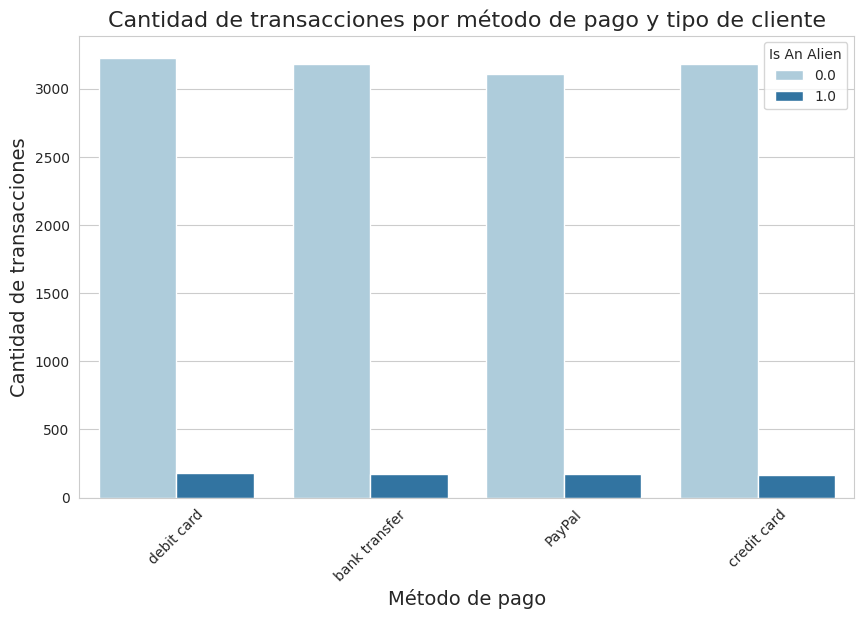

In [51]:
# Gráfico 1
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=pandas_df, hue='Is An Alien', palette="Paired")
plt.title('Cantidad de transacciones por método de pago y tipo de cliente', fontsize=16)
plt.xlabel('Método de pago', fontsize=14)
plt.ylabel('Cantidad de transacciones', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Se observa una tendencia consistente en la cantidad de transacciones realizadas, donde los aliens realizan un número significativamente menor de transacciones en comparación con los no aliens, independientemente del método de pago utilizado.

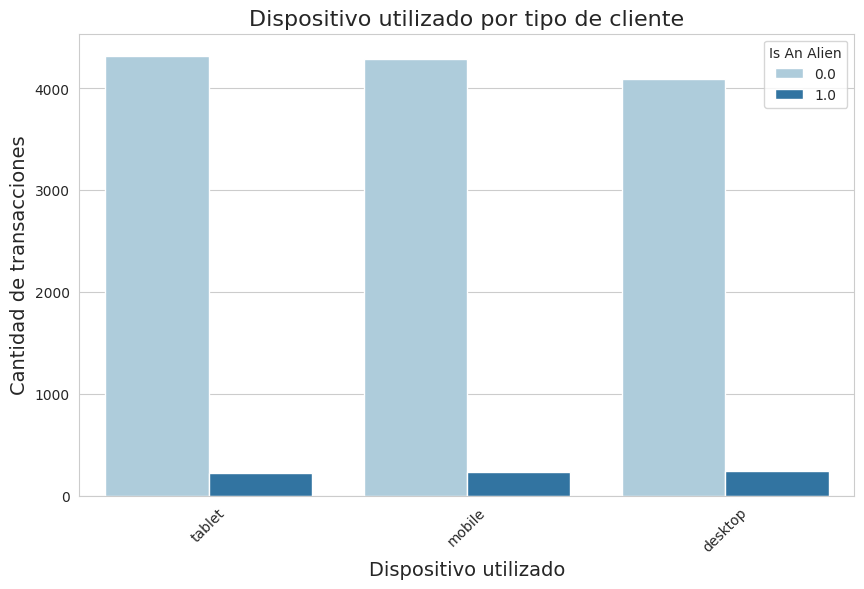

In [53]:
# Gráfico 2
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Device Used', data=pandas_df, hue='Is An Alien', palette="Paired")
plt.title('Dispositivo utilizado por tipo de cliente', fontsize=16)
plt.xlabel('Dispositivo utilizado', fontsize=14)
plt.ylabel('Cantidad de transacciones', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Similarmente al caso anterior, se observa una tendencia consistente en la cantidad de transacciones realizadas, donde los aliens realizan un número significativamente menor de transacciones en comparación con los no aliens, independientemente del dispositivo utilizado. Hay que destacar que aquellos entes no aliens, realizan menores compras con el tipo de dispositivo de "desktop".

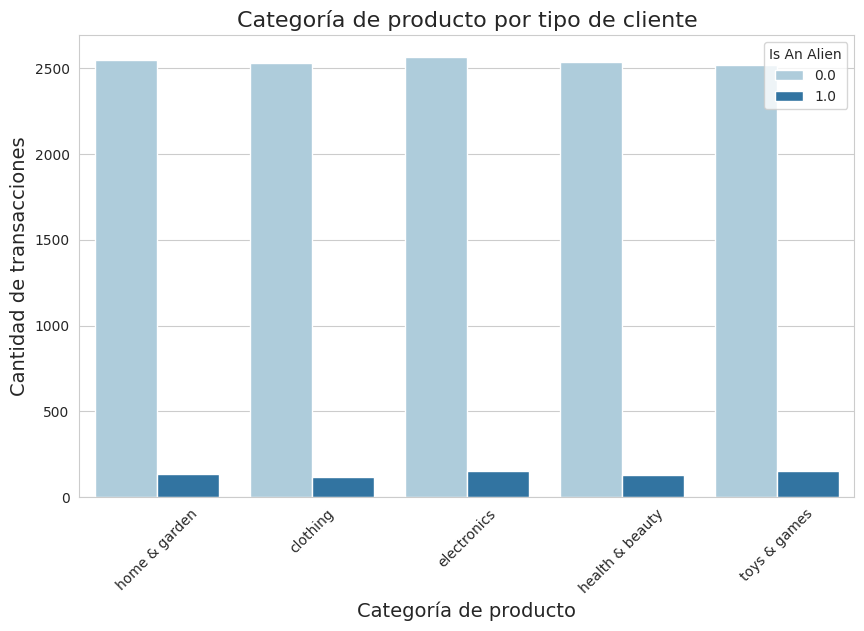

In [54]:
# Gráfico 3
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=pandas_df, hue='Is An Alien', palette="Paired")
plt.title('Categoría de producto por tipo de cliente', fontsize=16)
plt.xlabel('Categoría de producto', fontsize=14)
plt.ylabel('Cantidad de transacciones', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Por último, se observa nuevamente una tendencia consistente en la cantidad de transacciones realizadas, donde los aliens realizan un número significativamente menor de transacciones en comparación con los no aliens, independientemente de la categoría del producto.

Visualización de Variables Numéricas!

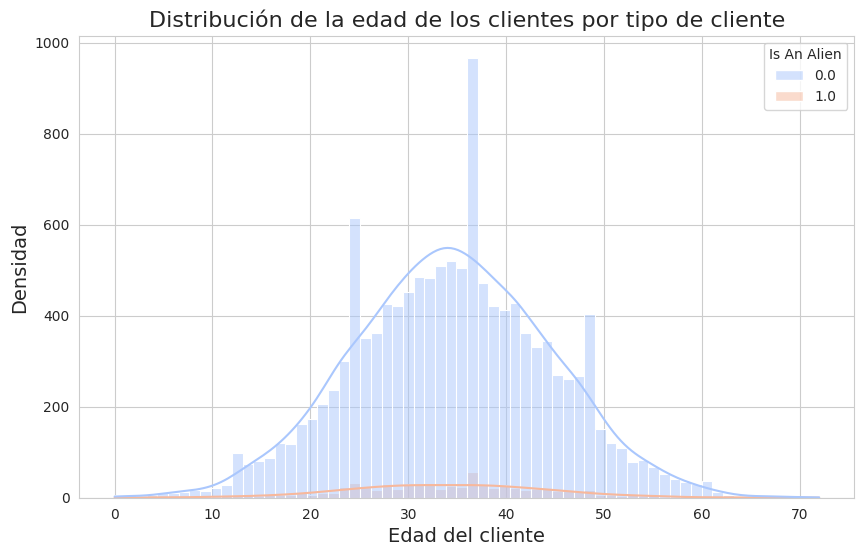

In [55]:
# Gráfico 1
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=pandas_df, x='Customer Age', hue='Is An Alien', kde=True, palette="coolwarm")
plt.title('Distribución de la edad de los clientes por tipo de cliente', fontsize=16)
plt.xlabel('Edad del cliente', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

Al estudiar las diferencias en la distribución de edades entre los clientes aliens y los no aliens, se observa que la distribución de edades de los clientes no aliens sigue una distribución gaussiana, lo que sugiere que hay una concentración de clientes alrededor de edades centrales, con menos clientes en los extremos más jóvenes y mayores. Por otro lado, en el caso de los aliens, no hay una concentración particular, sino que hay un número similar de personas para cada edad probable.

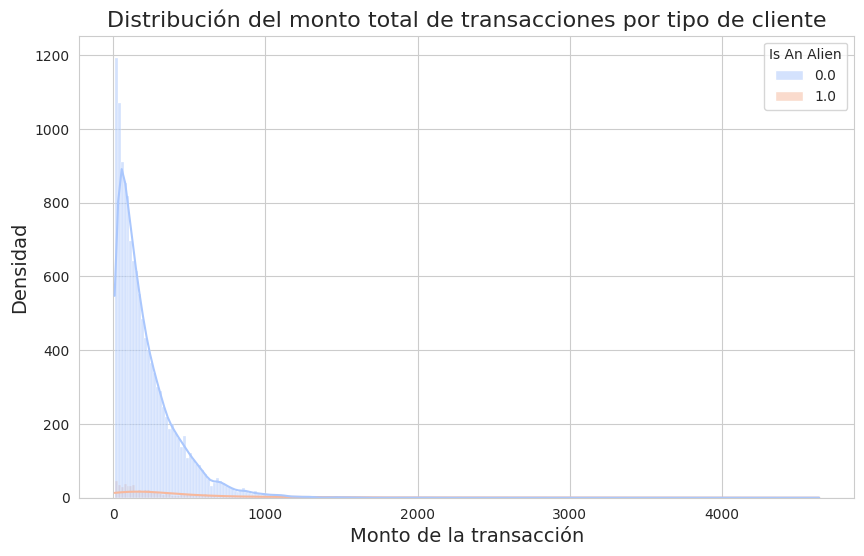

In [56]:
# Gráfico 2
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=pandas_df, x='Transaction Amount', hue='Is An Alien', kde=True, palette="coolwarm")
plt.title('Distribución del monto total de transacciones por tipo de cliente', fontsize=16)
plt.xlabel('Monto de la transacción', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

Se observa una diferencia significativa en la distribución de valores de transacciones entre los clientes aliens y los no aliens. Para los clientes no aliens, la distribución de valores de transacciones muestra una concentración muy marcada en transacciones de menor valor, lo que se asemeja a una distribución gaussiana desplazada hacia la izquierda. En cambio, para los clientes aliens, la distribución de valores de transacciones parece ser más uniforme, con menos transacciones de bajo valor y casi ninguna de alto valor.

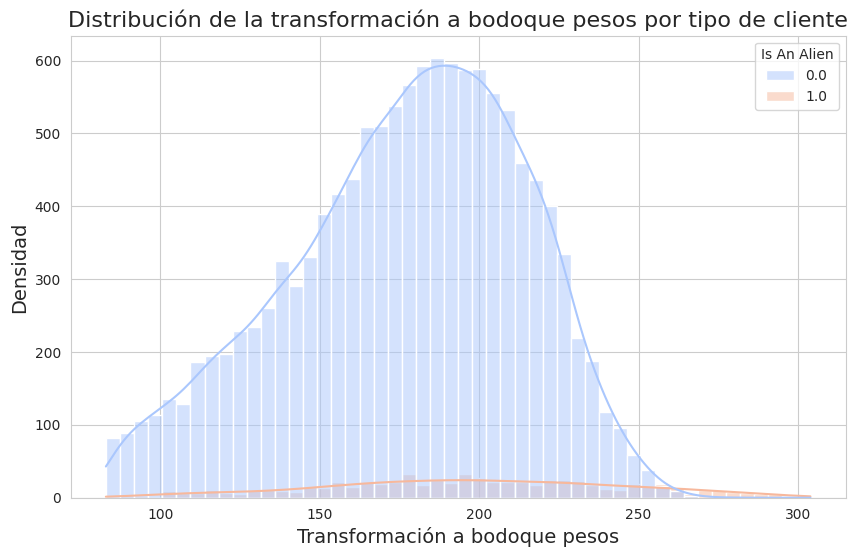

In [57]:
# Gráfico 3
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=pandas_df, x='Transaction bp', hue='Is An Alien', kde=True, palette="coolwarm")
plt.title('Distribución de la transformación a bodoque pesos por tipo de cliente', fontsize=16)
plt.xlabel('Transformación a bodoque pesos', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

Similar al gráfico anterior, este corresponde al monto total de la transacción con su densidad, sin embargo, los dólares originales de la transacción se convirtieron a pesos. Hay que destacar que la distribución asimétrica entre los estaba distorsionando la visualización de los datos, por lo que aplicar la fórmula correcta (que contiene un logaritmo en su estructura) ayuda a "aplanar estos datos", permitiendo que los datos sean más homogéneos. Podemos notar que hay una gran cantidad de datos centrados alrededor de los 190 bodoque pesos.

Análisis de Patrones!

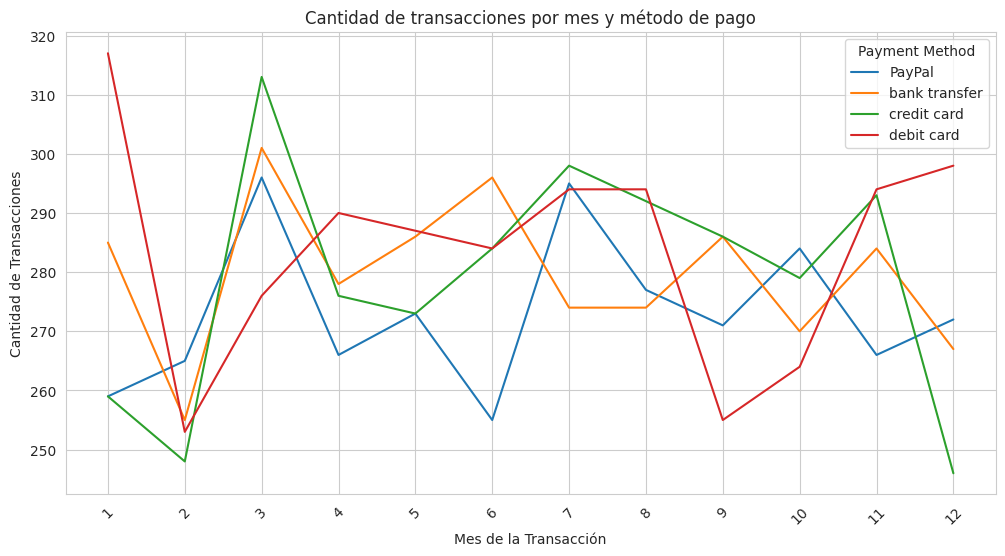

In [58]:
# Gráfico 1: Cantidad de transacciones por mes y método de pago
transaction_counts = pandas_df.groupby([pd.Grouper(key='Transaction Month'), 'Payment Method']).size().reset_index(name='Transaction Count')
meses = pandas_df['Transaction Month'].unique()  # Obtener todos los meses únicos
plt.figure(figsize=(12, 6))
sns.lineplot(x='Transaction Month', y='Transaction Count', hue='Payment Method', data=transaction_counts)
plt.title('Cantidad de transacciones por mes y método de pago')
plt.xticks(ticks=meses, labels=meses)
plt.xlabel('Mes de la Transacción')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)
plt.show()

No hay una tendencia generalmente evidente en el uso de los diferentes métodos de pago a lo largo del año, pero se observan picos significativos en ciertos momentos. Por ejemplo, el uso de tarjetas de crédito alcanza su punto máximo en marzo, posiblemente debido al aumento en el uso después de las vacaciones.

Lo que sugiere que, aunque no haya una tendencia consistente en el uso de los métodos de pago a lo largo del año, podrían existir períodos específicos que pueden influir en los picos de uso de ciertos métodos de pago.

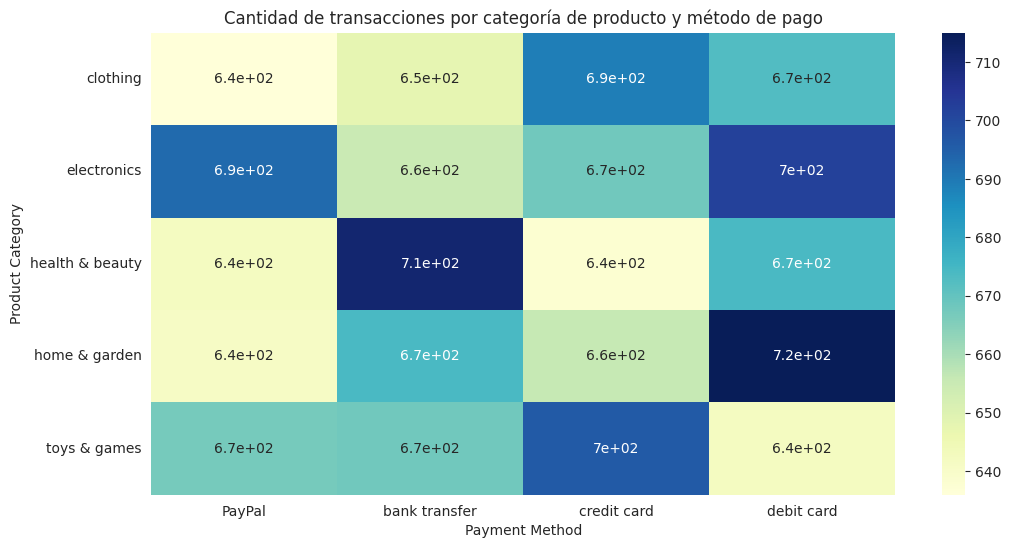

In [59]:
# Gráfico 2: Heatmap de la cantidad de transacciones por categoría de producto y método de pago
product_device_counts = pandas_df.groupby(['Product Category', 'Payment Method']).size().reset_index(name='Transaction Count')
pivot_table = product_device_counts.pivot(index='Product Category', columns='Payment Method', values='Transaction Count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Cantidad de transacciones por categoría de producto y método de pago')
plt.show()

El gráfico presentado corresponde a un mapa de calor, que permite verificar la correlación entre las variables de "Payment Method" y "Product Category". Podemos verificar que los productos electrónicos son mayormente pagados con transferencias bancarias, a diferencia de las otras opciones disponibles. Por otra parte, aquellas cosas de la casa y jardín son mayormente pagadas con tarjetas de débito. Todos aquellos resultados que tomen colores cercanos al azul representan una gran correlación entre datos, mientras que los más amarillos demuestran una correlación leve. Aunque hay que destacar que la diferencia de transacciones es de casi 100, por lo que no es un cambio tan brusco, son compras casi equiparadas.

Estos análisis permitirán entregar facilidades a los clientes, tal vez fomentando la compra de ciertas categorías con otros métodos de pago aplicando descuentos.

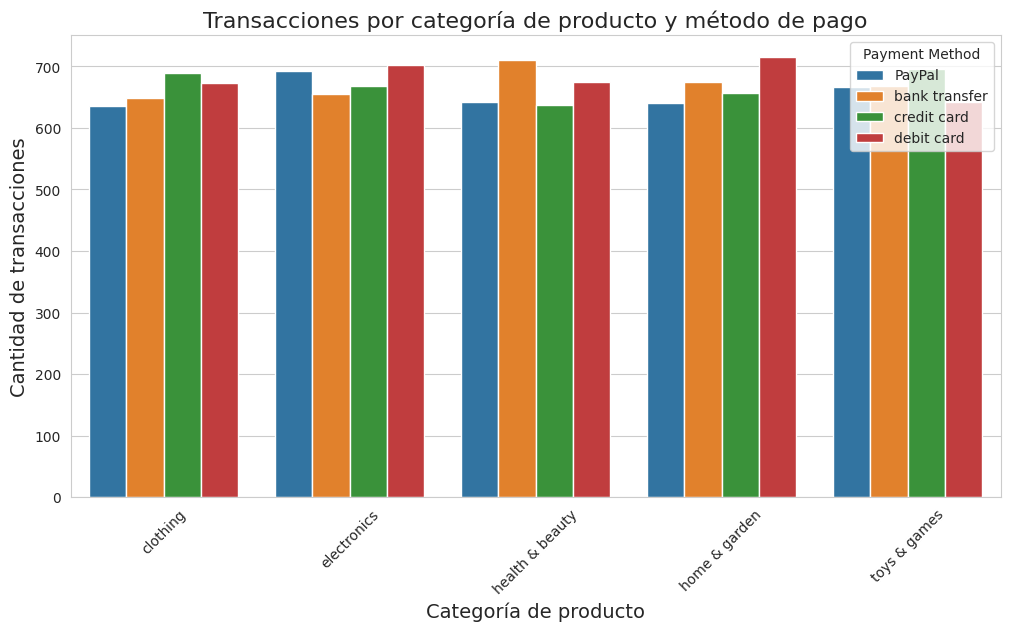

In [60]:
# Gráfico 3
transaction_counts = pandas_df.groupby(['Product Category', 'Payment Method'])['Transaction ID'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Transaction ID', hue='Payment Method', data=transaction_counts)
plt.title('Transacciones por categoría de producto y método de pago', fontsize=16)
plt.xlabel('Categoría de producto', fontsize=14)
plt.ylabel('Cantidad de transacciones', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Se puede observar que independientemente de la categoría de productos, la cantidad de transacciones por método de pago para cada categoría oscila constantemente entre 600 y 700 transacciones. Esta uniformidad en las transacciones sugiere que no hay peaks de interés particular en ningún método de pago específico, ya que la cantidad de transacciones es casi constante.

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [37]:
# Código Aquí
# Punto 1
pk.write.partitionBy("Product Category", "Transaction Month", "Payment Method").saveAsTable(name='table_1')

Según nuestro criterio, las mejores variables por las cuales realizar las particiones corresponden a "Product Category", "Transaction Amount" y "Payment Method". Esto se debe a que son categorías que pueden ser relevantes para realizar análisis posteriores. Por ejemplo, se puede verificar qué tipo de productos son más comprados a partir del mes de su compra. Digamos, por ejemplo, que hay productos relacionados con el invierno, por lo que tendría sentido verificar si tienen alta demanda en los meses 6-9 (considerando que estos son los meses de invierno en Chile). Además, si se particiona por "Payment Method", se puede verificar qué método de pago es más usado por los usuarios, por lo que se les puede dar facilidades o descuentos a los que más usen cierto método, o también se puede analizar por qué en cierto mes usaron este método, como por ejemplo si hubo un Black Friday o un Cyber Day. Por otra parte, se considera que la columna de "Customer Location" puede ser útil, pero  puede hacer que los análisis sean más difíciles si se trata de una tienda de escala global y no local.

Finalmente, se estima que para las consultas que se van a ejecutar dentro de la tarea, estas 3 variables corresponden a las mejores opciones para no tener que llevar a cabo muchas ejecuciones e impactar negativamente el rendimiento de las consultas.

In [38]:
spark.sql("SELECT * FROM table_1").show()

+--------------------+--------------------+------------------+-------------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+----------------+----------------+-----------------+--------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Type of purchase|Product Category|Transaction Month|Payment Method|
+--------------------+--------------------+------------------+-------------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+----------------+----------------+-----------------+--------------+
|ae2e2709-9550-4bd...|

In [39]:
# Punto 2
# Los resultados tienen sentido dado que anteriormente comprobamos que no hay entes (alien o no alien) que cumplan con la condición de tener compras mayoristas!
spark.sql("""
SELECT
`Customer ID`, SUM(Quantity) AS Total_products
FROM table_1
GROUP BY `Customer ID`
ORDER BY Total_products DESC
LIMIT 10
""").show()

+--------------------+--------------+
|         Customer ID|Total_products|
+--------------------+--------------+
|4596bfd7-49c4-45d...|           5.0|
|f1ceba56-5797-436...|           5.0|
|d36b7bc7-3c27-4bd...|           5.0|
|6c2cab61-ba6e-4a8...|           5.0|
|69762f11-4faf-421...|           5.0|
|a1f61636-d50b-434...|           5.0|
|d2575c53-63be-411...|           5.0|
|46438230-4eb2-4f8...|           5.0|
|42c09cf5-3a83-4ec...|           5.0|
|c39e2fe4-c42b-468...|           5.0|
+--------------------+--------------+



In [40]:
# Punto 3
# 90 por los últimos 3 meses, es una forma muy aproximada de abordar el problema!
spark.sql("""
SELECT
`Customer ID`,MAX(`Transaction Amount`) OVER (PARTITION BY `Customer ID` ORDER BY `Transaction Date` ROWS BETWEEN 90 PRECEDING AND CURRENT ROW) AS Max_Buy
FROM table_1
""").show()

+--------------------+-------+
|         Customer ID|Max_Buy|
+--------------------+-------+
|0005f674-821d-4c4...| 107.11|
|000695ce-4310-416...| 689.58|
|0010bfa7-d3b5-442...| 130.74|
|001341a1-ce95-4f6...| 222.59|
|0013653b-9ed4-4fa...| 749.29|
|0027a40f-9d45-422...|  84.59|
|0028d9e7-55bf-4e6...| 221.28|
|002a2b79-e86c-478...| 331.93|
|0034597d-5db9-4ef...| 221.23|
|0035807b-8ab5-4f8...| 175.59|
|0037cc7b-fb0b-433...| 132.98|
|003b44c7-7a97-47d...|  82.02|
|003bddcf-270a-474...| 289.59|
|004d6df5-5d37-4cd...|  32.36|
|004de8d7-e274-4f3...|  74.56|
|005599ec-2770-498...|  40.28|
|0055c3b0-82b2-4d2...| 384.07|
|0059b734-6741-4e3...|   21.1|
|005e18a8-8d00-402...|   79.5|
|0061c7c7-ffd9-40d...| 255.97|
+--------------------+-------+
only showing top 20 rows



Un resultado similar aplicando Spark sería aplicar una partición por ventana dentro de los últimos 90 días. Después, seleccionamos nuevamente el ID del comprador y retornamos solo el valor máximo sobre la ventana definida, asignándole finalmente un alias, tal como se haría en una consulta de SQL!

Como podemos verificar se obtienen los mismos resultados, pero hay que destacar que los tiempos de ejecución con Spark fueron levemente más rapidos (con SQL demoró 5 segundos y con Spark 2 segundos! Algo es algo :) )   


In [46]:
from pyspark.sql.window import Window
window_spec = Window.partitionBy("Customer ID").orderBy("Transaction Date").rowsBetween(-90, 0)

In [48]:
import pyspark.sql.functions as F
max_buy_spark = pk.select(
    "Customer ID",
    F.max("Transaction Amount").over(window_spec).alias("Max_Buy_Spark")).show()

+--------------------+-------------+
|         Customer ID|Max_Buy_Spark|
+--------------------+-------------+
|0005f674-821d-4c4...|       107.11|
|000695ce-4310-416...|       689.58|
|0010bfa7-d3b5-442...|       130.74|
|001341a1-ce95-4f6...|       222.59|
|0013653b-9ed4-4fa...|       749.29|
|0027a40f-9d45-422...|        84.59|
|0028d9e7-55bf-4e6...|       221.28|
|002a2b79-e86c-478...|       331.93|
|0034597d-5db9-4ef...|       221.23|
|0035807b-8ab5-4f8...|       175.59|
|0037cc7b-fb0b-433...|       132.98|
|003b44c7-7a97-47d...|        82.02|
|003bddcf-270a-474...|       289.59|
|004d6df5-5d37-4cd...|        32.36|
|004de8d7-e274-4f3...|        74.56|
|005599ec-2770-498...|        40.28|
|0055c3b0-82b2-4d2...|       384.07|
|0059b734-6741-4e3...|         21.1|
|005e18a8-8d00-402...|         79.5|
|0061c7c7-ffd9-40d...|       255.97|
+--------------------+-------------+
only showing top 20 rows



### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [ ]:
# Código Aquí
# Punto 1
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
import pickle

def custom_function(col):
  pass


udf_function = udf(custom_function, FloatType())

#No pudimos hacerla pipipipi :(